In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
path='features.xlsx'  #give path where extracted features are saved

In [11]:
abc=pd.read_excel(path,header=None)
abc.head()

,0,1,2,3,4,5,6
0,NaN,contrast,dissimilarity,homogeneity,ASM,energy,Label
1,0.0,12769357,562393,2747.88,312782,559.269,0
2,1.0,9580203,482361,3308,289038,537.623,0
3,2.0,10928946,517098,3084.55,337650,581.077,0
4,3.0,12465011,556457,2776.65,372854,610.618,0


In [12]:
X=np.array((abc.as_matrix())[1:,1:])
Y=X[:,5]
X=X[:,0:5]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

C:\Users\thaqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.decomposition import PCA

In [14]:
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))

In [15]:
X_test=pd.DataFrame(scaler.fit_transform(X_test))

In [16]:
def search_for_parameters(estimator,X_data,y_data,grid_parameters,scoring="accuracy",cv=3):
    classes=[0., 1., 2., 3., 4., 5.]
    
    ##Doing grid search to find the optimal valuess....
    grid_clf=GridSearchCV(estimator=estimator,scoring=scoring,param_grid=grid_parameters,iid=False,cv=cv,n_jobs=-1)
    
    grid_clf.fit(X_data,y_data)
    print("The best parameters are: ",grid_clf.best_params_)
    return grid_clf.best_params_

In [17]:
svm_clf=SVC(class_weight='balanced')

In [18]:
svm_params_list={'C':[1,2,4,8],'kernel':['poly','rbf','sigmoid'],'degree':[3,4,5,6],'gamma':['auto','scale']}
svm_parameters=search_for_parameters(estimator=svm_clf,X_data=X_train,y_data=y_train,grid_parameters=svm_params_list)

svm_clf.set_params(**svm_parameters)
svm_clf.fit(X_train,y_train)

The best parameters are:  {'C': 8, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=8, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
def cross_validate(estimator,X_data,y_data,scoring='accuracy',cv=3,Z=2):
    classes=[0., 1., 2., 3., 4., 5.]
    
    ##Excuting CrossValidation...
    scores=cross_val_score(estimator=estimator,X=X_data,y=y_data,cv=cv,scoring=scoring)
    
    print("Model Scoring Evaluation Results")
    print("THe mean score and the confidence interval of the scores estimate are: ")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*Z))

cross_validate(estimator=svm_clf,X_data=X_train,y_data=y_train,cv=5)

Model Scoring Evaluation Results
THe mean score and the confidence interval of the scores estimate are: 
Accuracy: 0.83 (+/- 0.01)


In [20]:
##Prediction on Test..


In [21]:
y_true,y_pred=y_test,svm_clf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("#"*50)

print()

print("Classification Report: ")
print()
print(classification_report(y_true,y_pred))

Accuracy:  0.85
##################################################

Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        57
           1       0.67      0.92      0.78        53
           2       1.00      0.84      0.91        68
           3       0.79      0.68      0.73        62
           4       0.90      1.00      0.95        53
           5       0.96      0.73      0.83        67

    accuracy                           0.85       360
   macro avg       0.86      0.86      0.85       360
weighted avg       0.87      0.85      0.85       360



In [22]:
#Confusion Matrix..



In [23]:
cm=confusion_matrix(y_true,y_pred)
print(cm)

[[56  0  0  1  0  0]
 [ 0 49  0  4  0  0]
 [ 6  0 57  5  0  0]
 [ 5  7  0 42  6  2]
 [ 0  0  0  0 53  0]
 [ 0 17  0  1  0 49]]


Text(0.5, 257.44, 'Predicted label')

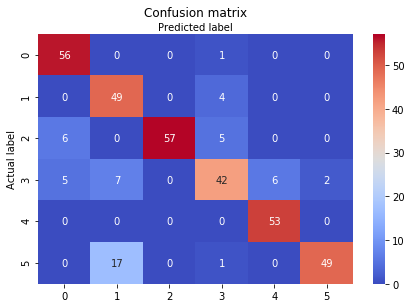

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')